# Introduction

**<font size="4">Evaluation</font>**
<br>

As diagnosis point of view, screen out potential high risk group should be => over 95% precision of class 0 (without disease), and over 75% class 1 (with disease) recall is sufficient when all the major features are not recognized as the real informative features toward heart disease. 
<br>


**<font size="4">Purpose</font>**
<br>

Predicting the occurrence of the heart disease by given 319,796 patients with various clinical parameters/features but not major features of heart disease.


# Material and Methods

**<font size="4">Data Sources</font>**
<br>

The original data came from Centers for Disease Control and Prevention (CDC)- 2020 BRFSS Survey Data and Documentation https://www.cdc.gov/brfss/annual_data/annual_2020.html This is the modified version of it from Kaggle (Data organization and cleaning) https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv
<br>


**<font size="4">Features</font>**
<br>

This data dictionary is caputured from Kaggle. https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv
<br>
**HeartDisease** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
<br>
**BMI** Body Mass Index (BMI)
<br>
**Smoking** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
<br>
**AlcoholDrinking Heavy drinkers** (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
<br>
**Stroke** (Ever told) (you had) a stroke?
<br>
**PhysicalHealth** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
<br>
**MentalHealth** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
<br>
**DiffWalking** Do you have serious difficulty walking or climbing stairs?
<br>
**Sex** Are you male or female?
<br>
**AgeCategory** Fourteen-level age category
<br>
**Race** Imputed race/ethnicity value
<br>
**Diabetic** (Ever told) (you had) diabetes?
<br>
**PhysicalActivity** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
<br>
**GenHealth** Would you say that in general your health is...
<br>
**SleepTime** On average, how many hours of sleep do you get in a 24-hour period?
<br>
**Asthma** (Ever told) (you had) asthma?
<br>
**KidneyDisease** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
<br>
**SkinCancer** (Ever told) (you had) skin cancer?
<br>


**<font size="4">Modelling (Machine Learning Strategy)</font>**
<br>

Supervised Learning: Classification
<br>
**6 models and 1 voting classifier** (get all 6 model prediction results and make decision):
"Logistic Regression", "SGD" , "SVC", "Decision Tree", "RandomForest", "XGBoost"
"Voting Classifier"


## Importing Libraries/Tools

In [1]:
#Exploratory Data Analysis and Graphing Tools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine Learning Tools- Scitkitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#Data Transforming Tools
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn import preprocessing 


#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

## Loading Data

In [2]:
heart_disease_df = pd.read_csv("heart_2020_cleaned.csv")
heart_disease_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


data is sucessfully loaded

## Checking for Missing Data

In [3]:
heart_disease_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

data has no missing data 

# Results - Exploratory Data Analysis (EDA)

This section also checks if any feature has outliers

## Pie Graph for Potential Imbalance Categorical Data

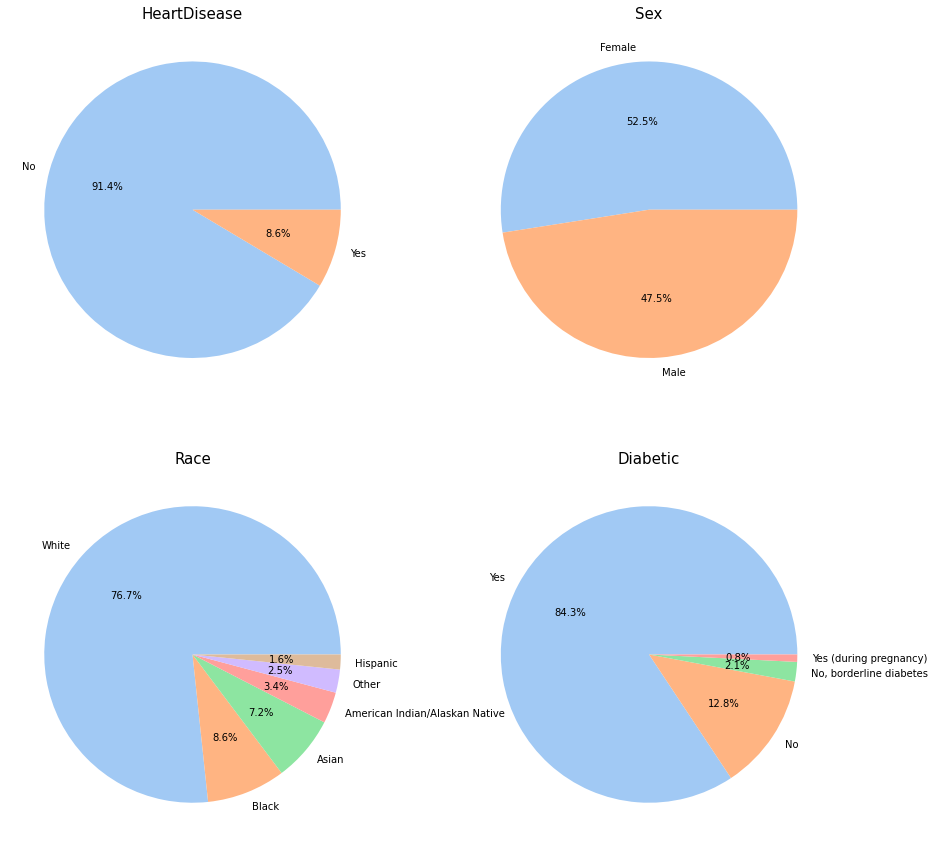

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(15,15))

colors = sns.color_palette('pastel')
ax1.pie(data=heart_disease_df, x= heart_disease_df["HeartDisease"].value_counts(),labels = heart_disease_df["HeartDisease"].unique(), colors = colors, autopct='%.1f%%')
ax2.pie(data=heart_disease_df, x= heart_disease_df["Sex"].value_counts(),labels = heart_disease_df["Sex"].unique(), colors = colors, autopct='%.1f%%')
ax3.pie(data=heart_disease_df, x= heart_disease_df["Race"].value_counts(),labels = heart_disease_df["Race"].unique(), colors = colors, autopct='%.1f%%')
ax4.pie(data=heart_disease_df, x= heart_disease_df["Diabetic"].value_counts(),labels = heart_disease_df["Diabetic"].unique(), colors = colors, autopct='%.1f%%')

ax1.set_title('HeartDisease', fontsize =15)
ax2.set_title('Sex', fontsize =15)
ax3.set_title('Race', fontsize =15)
ax4.set_title('Diabetic', fontsize =15)

plt.show()

**Summary**: 
<br>
1. In the Heart Disease Pie chart, most data are "No Heart Disease." This is an example of  **Imbalance data**
<br>
2. In the Race Pie chart, since this dataset is collected in America. Consequently, the dataset does not follow with World's Race ratio. This can be a **sampling bias** if the data is applied to a country outside of the American

## Bar Graph for Categorical Data

In [5]:
categorical_features = []
for col_name in heart_disease_df.columns: 
    if heart_disease_df[col_name].dtype == object:
        print(col_name, ":", heart_disease_df[col_name].nunique()) 
        categorical_features.append(col_name)
 
numeric_features = []
for col_name in heart_disease_df.columns: 
    if heart_disease_df[col_name].dtype == float: 
        print(col_name, ":", heart_disease_df[col_name].nunique()) 
        numeric_features.append(col_name)

HeartDisease : 2
Smoking : 2
AlcoholDrinking : 2
Stroke : 2
DiffWalking : 2
Sex : 2
AgeCategory : 13
Race : 6
Diabetic : 4
PhysicalActivity : 2
GenHealth : 5
Asthma : 2
KidneyDisease : 2
SkinCancer : 2
BMI : 3604
PhysicalHealth : 31
MentalHealth : 31
SleepTime : 24


In [6]:
#This preprocessing process is only used for data visualization

label = preprocessing.LabelEncoder() 
l_heart_disease_df = heart_disease_df.copy()

for col_name in categorical_features:
    l_heart_disease_df[col_name] = label.fit_transform(heart_disease_df[col_name])

### Bar Graph with Overall Percentage in Each Features

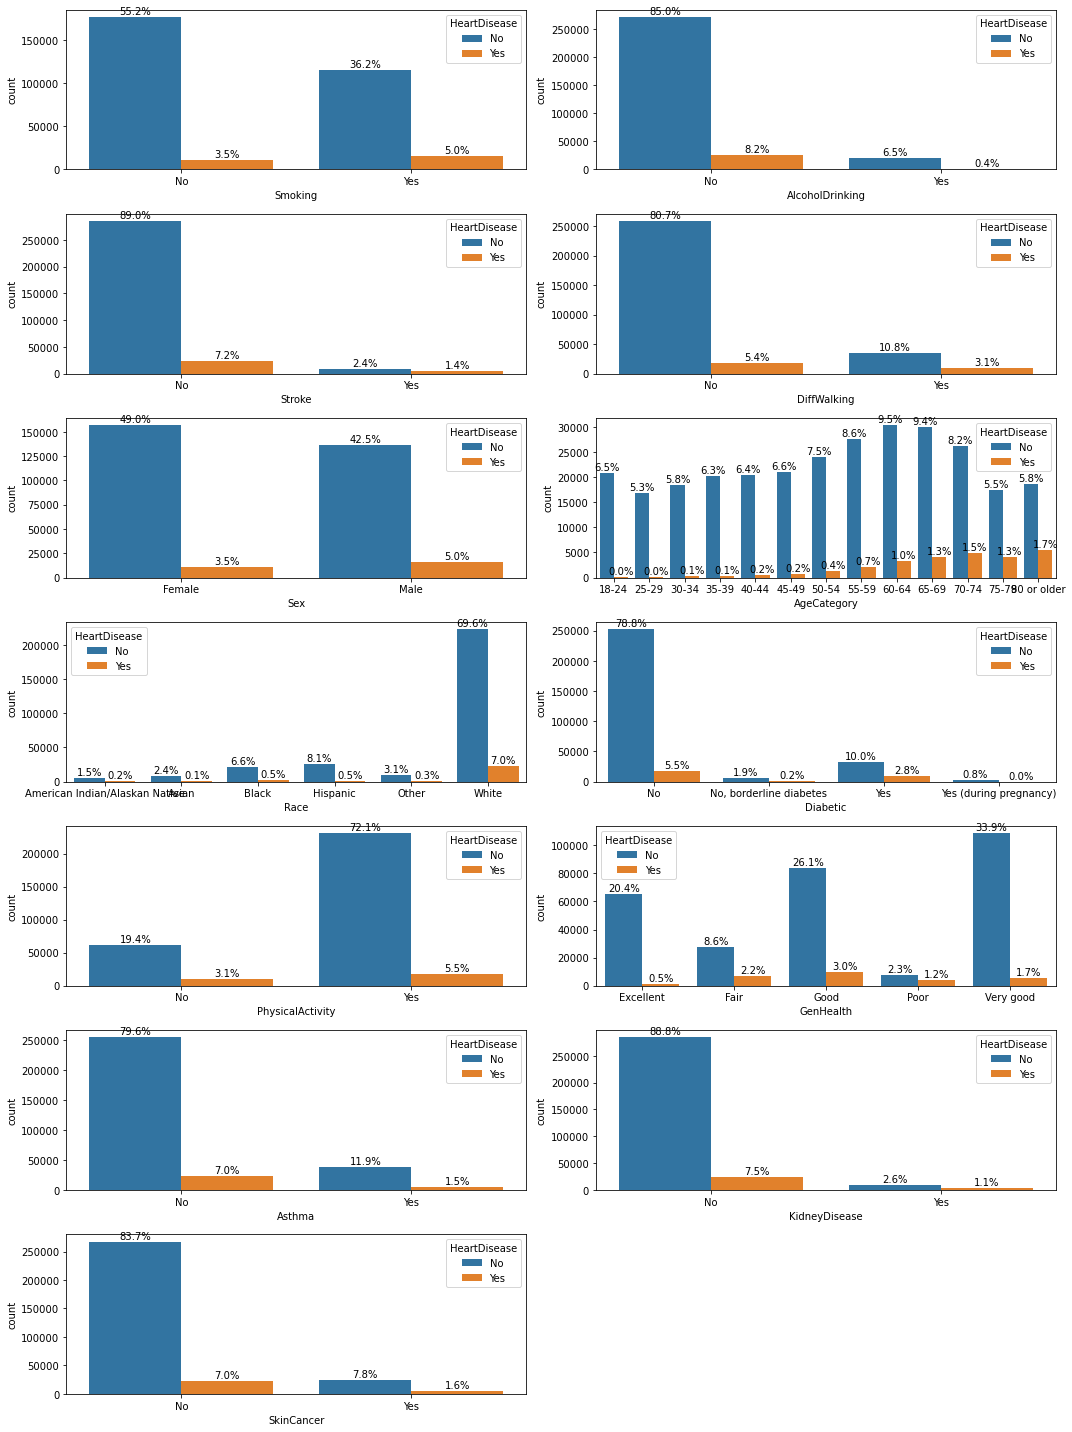

In [7]:
i = 1
plt.figure(figsize=(15,20))
for categories in categorical_features[1:]:
    ax = plt.subplot(7,2,i)
    g = sns.countplot(x=l_heart_disease_df[categories], hue=heart_disease_df["HeartDisease"])
    i +=1
    g.set(xticklabels=(sorted(heart_disease_df[categories].unique())))
    
    
    total = len(heart_disease_df[categories])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
        plt.tight_layout(h_pad=1.0)

**Summary**: 
<br>
1. In the Diabetic bar graph, the class "yes(during pregnancy)" has only 0.8% of data in total, and nearly none of them got heart disease. 
<br>
This is an example lack of data, which can potentially affect the inference badly.

### Bar Graph with Each Sub-features Percentage in Each Features

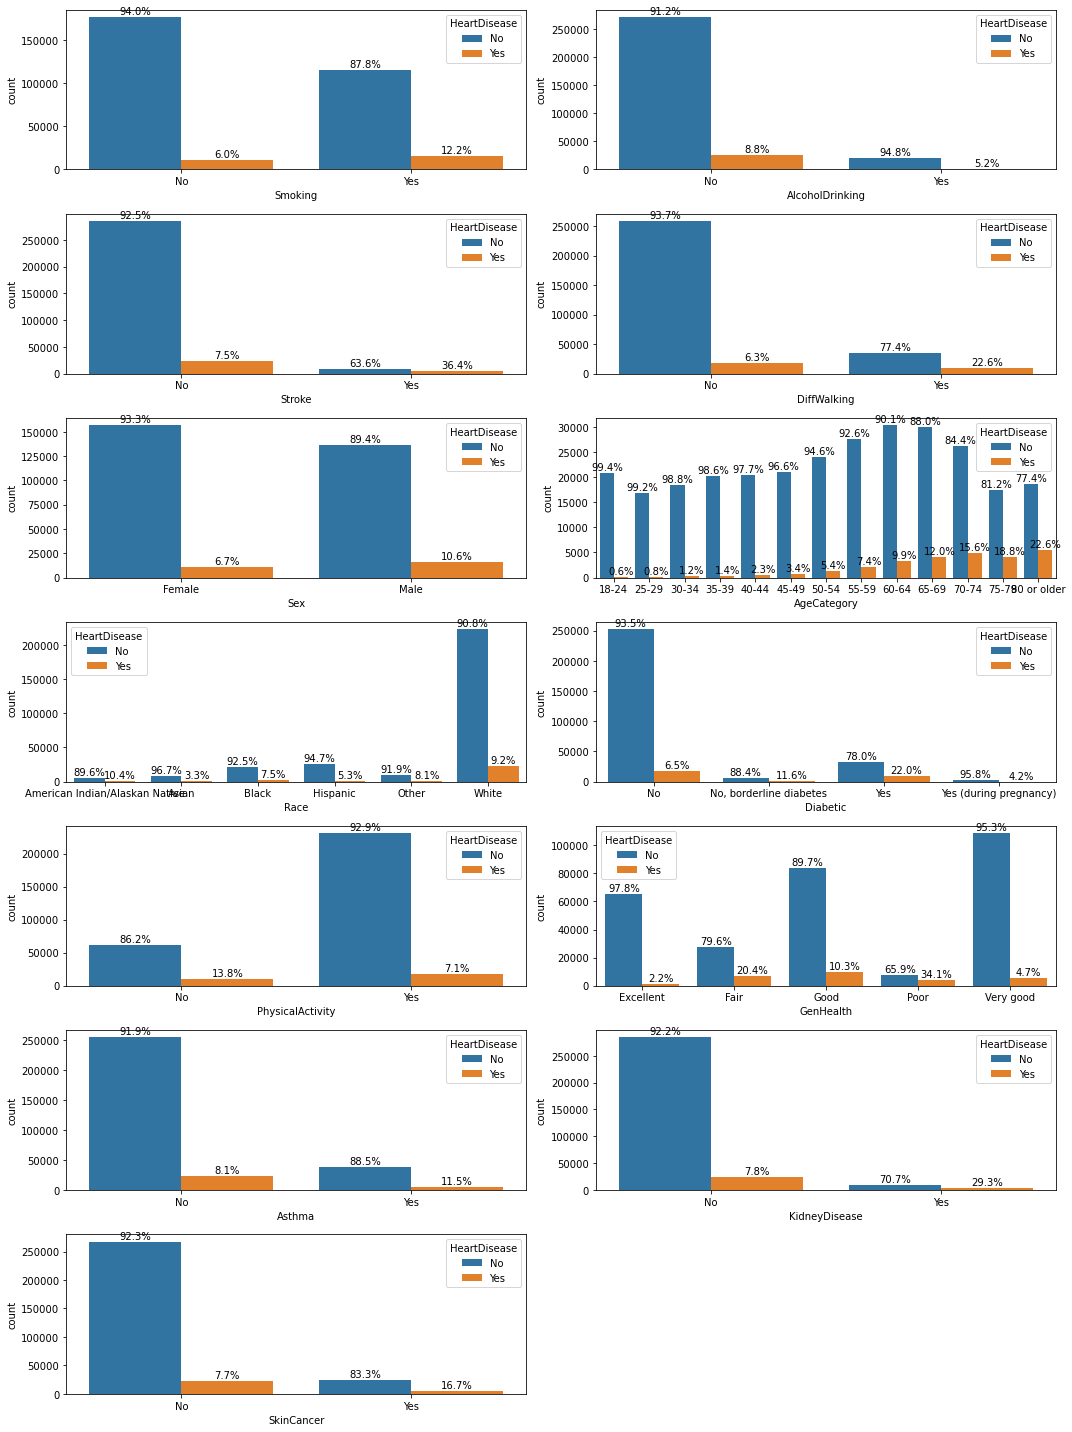

In [8]:
i = 1
plt.figure(figsize=(15,20))
for categories in categorical_features[1:]:
    ax = plt.subplot(7,2,i)
    g = sns.countplot(x=l_heart_disease_df[categories], hue=heart_disease_df["HeartDisease"])
    i +=1
    g.set(xticklabels=(sorted(heart_disease_df[categories].unique())))
    
    count = 0
    for p in ax.patches:

        sub_categories = l_heart_disease_df[categories].value_counts()
      
        
        if  count!= 0 and len(ax.patches)/count == 2 :
            count = 0
            total = sub_categories[count]
            
        total = sub_categories[count]    
        #print(count)   
        #print(p.get_height(), total)
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
        plt.tight_layout(h_pad=1.0)
        count+=1 

## Histogram for Numerical Data

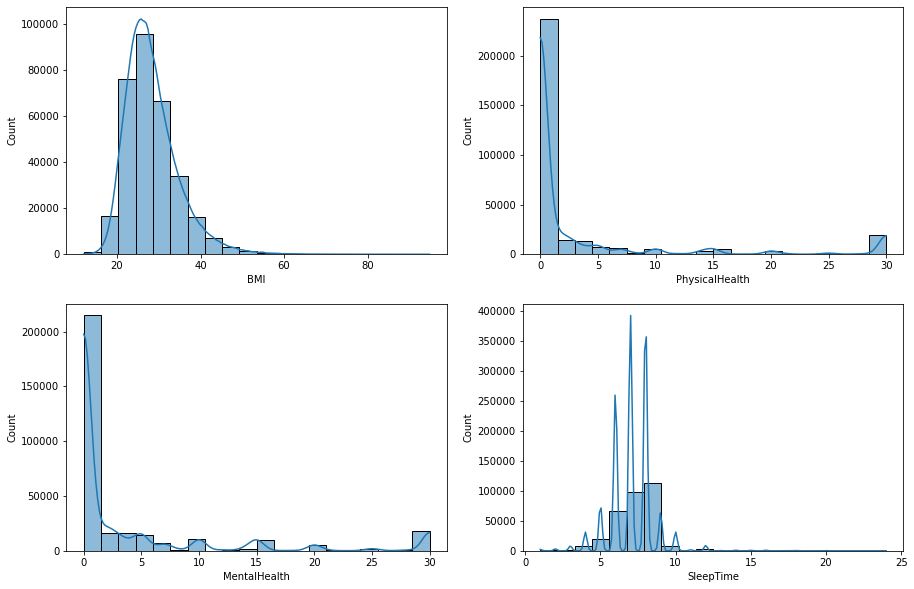

In [9]:
i = 1
plt.figure(figsize=(15,10))
for numeric in numeric_features:
    ax = plt.subplot(2,2,i)
    sns.histplot(x=heart_disease_df[numeric],kde=True, bins=20)
    i += 1

**Summary**:
1. BMI and sleep time features are normal distribution
2. Mental and Physical health is positively skewed (or right-skewed) distribution

## Boxplots and Statistic for Numerical Data

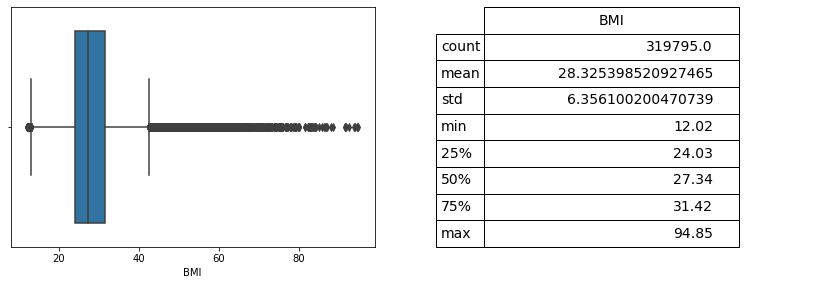

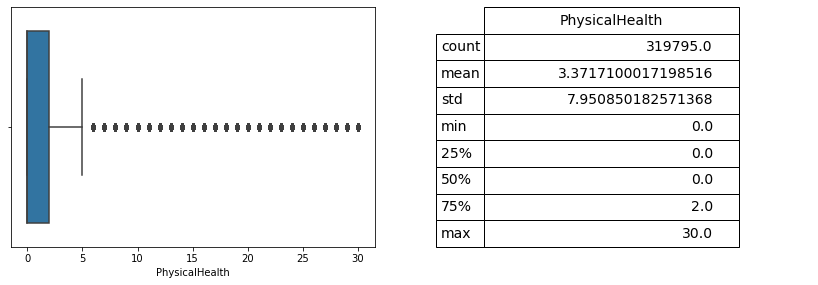

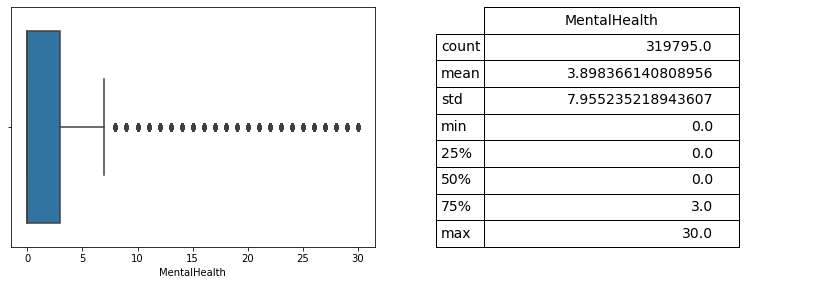

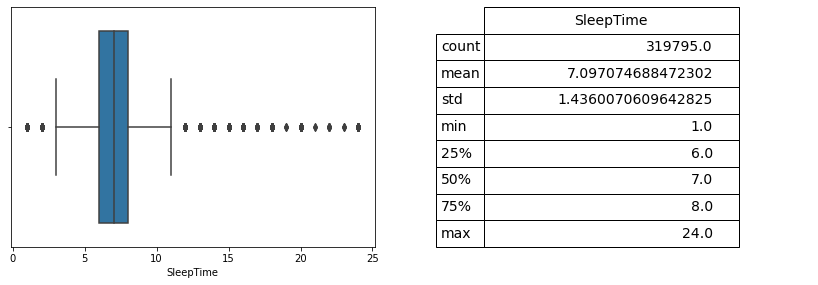

In [10]:
i = 0
num_rows = 3
num_cols = 2

for numeric in numeric_features:
    df = pd.DataFrame(heart_disease_df[numeric].describe())


    fig = plt.figure(figsize=(30,15))

    ax1 = fig.add_subplot(num_rows, 2*num_cols, 2*i+1)
    sns.boxplot(x=heart_disease_df[numeric])

    ax2 = fig.add_subplot(num_rows, 2*num_cols, 2*i+2)
    font_size=14
    bbox=[0.1, 0, 0.7, 1]

    ax2.axis('off')
    mpl_table = ax2.table(cellText = df.values, rowLabels = df.index, bbox=bbox, colLabels=df.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    
    i += 1

**Summary**:
1. In the Sleep Time statistic, sleeping 24 hours per day is impossible; unless there is a persistent vegetative state or others. It may consider a rare or outlier case. 

## KDE plot for Numerical Data

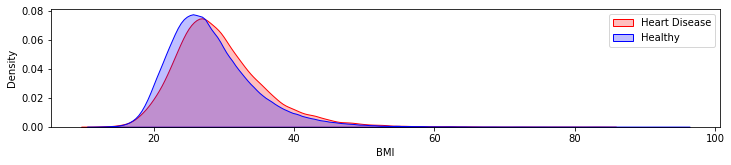

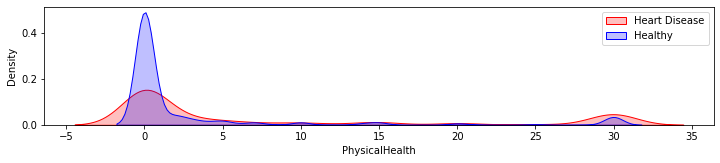

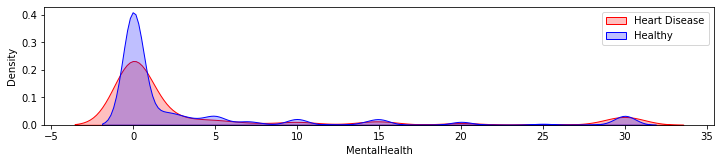

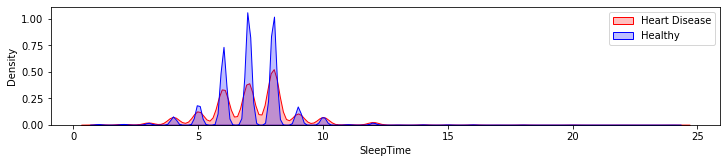

In [11]:
i= 1
for numeric in numeric_features:
    plt.figure(figsize=(12,10))
    ax = plt.subplot(4,1,i)
    sns.kdeplot(l_heart_disease_df[l_heart_disease_df['HeartDisease']==1][numeric],shade=True,color='red') 
    sns.kdeplot(l_heart_disease_df[l_heart_disease_df['HeartDisease']==0][numeric],shade=True,color='blue')
    plt.legend(labels=["Heart Disease","Healthy"])
    i +=1

## KDE plot for Disease-Related Data

C:\Users\dakfo\AppData\Local\Temp\ipykernel_28056\1785991373.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set(xticklabels=([0,21,32,42,52,62,72,80]));


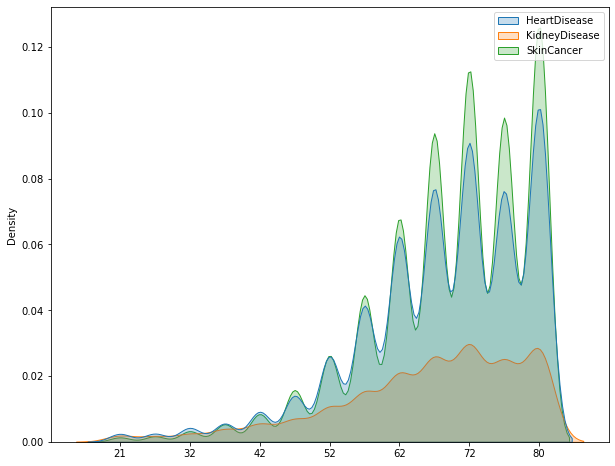

In [12]:
s1 = l_heart_disease_df[l_heart_disease_df['HeartDisease']==1]["AgeCategory"]
s2 = l_heart_disease_df[l_heart_disease_df['KidneyDisease']==1]["AgeCategory"]
s3 = l_heart_disease_df[l_heart_disease_df['SkinCancer']==1]["AgeCategory"]


disease_df = pd.concat([s1,s2,s3],axis=1)
disease_df.columns = ['HeartDisease', 'KidneyDisease', 'SkinCancer']
plt.figure(figsize=(10,8))
g = sns.kdeplot(data=disease_df, fill=True) 
g.set(xticklabels=([0,21,32,42,52,62,72,80]));

## Confusion Matrix

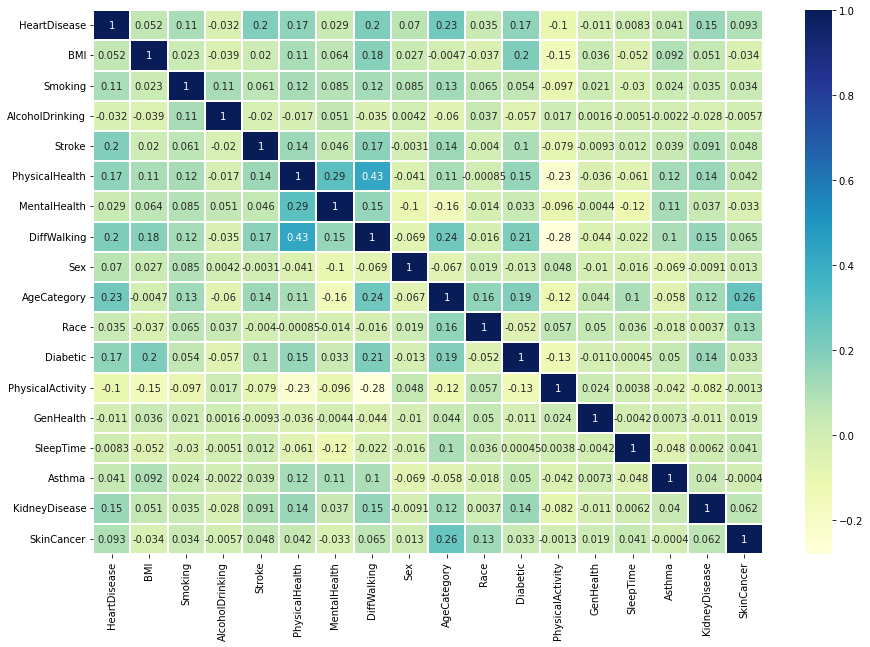

In [13]:
corr_matrix = l_heart_disease_df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.4,
                 cmap ="YlGnBu");

### Confusion matrix- Heart Disease

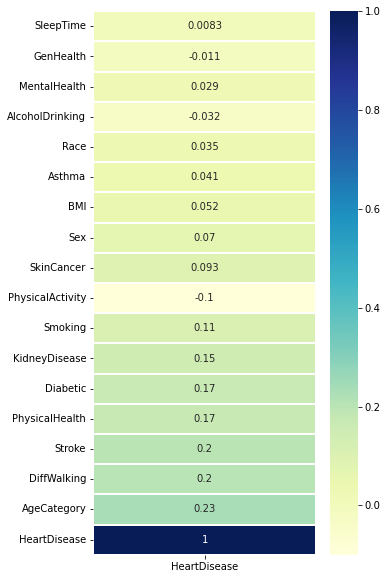

In [14]:
corr_matrix = l_heart_disease_df.corr().sort_values(by="HeartDisease",ascending=True,key=abs)
fig, ax = plt.subplots(figsize = (5,10))
ax = sns.heatmap(corr_matrix[["HeartDisease"]],
                 annot = True,
                 linewidths = 0.4,
                 cmap ="YlGnBu");

`|Number|` is larger; indicates it is more correlated to the heart disease in the first place
<br>
Ps. It can be different after **data preprocessing (scaling)** and **data mining**

## Summary for Results- EDA 

**✔️: will do in the following notebook**

1. In the Heart Disease Pie chart, most data are "No Heart Disease." This is an example of **Imbalance data**
- For Machine Learning, this feature requires **NearMiss** or **Undersampling** data treatment ✔️
<br>
2. In the Race Pie chart, since this dataset is collected in America. Consequently, the dataset does not follow with World's Race ratio. This can be  a **sampling bias** if the data is applied to a country outside of the American
- If the model is utilized outside of America; drop this feature
<br>
3. In the Diabetic bar graph, the class "yes(during pregnancy") has only 0.8% of data in total, and nearly none of them got heart disease. This is an example of a lack of data, which can affect the inference badly.
- Eliminate the entire patients' group with the class "yes(during pregnancy")
- Classify all classes into "yes" and "no" only(4 groups to 2 groups), or use **One-Hot Encoder** with those four groups ✔️
<br>
4. In the Sleep Time statistic, sleeping 24 hours per day is impossible; unless there is a persistent vegetative state or others. It may consider a rare or outlier case. 
- Sleep Time can be turned into categories features with Normal Sleep Time (6-12 hours), Less Sleep Time(under 6 hours) and Abnormal Sleep Time (> 12 hours)
- Keep it, and utilize the model/scaling methods that can automatically ignore the outliers  ✔️

# Results - Machine Learning (Scikit Learn)

In this section, six models are trained/tested and be optimized by hyperparameter tuning. 

## Data Treatment

### Converting Heart Disease Class

In [15]:
LabelEncoder = LabelEncoder()
LabelEncoder.fit(heart_disease_df["HeartDisease"])
heart_disease_df["HeartDisease"] = LabelEncoder.transform(heart_disease_df["HeartDisease"])

heart_disease_df["AgeCategory"] = heart_disease_df["AgeCategory"].map(lambda x: float(x[0:2])+2, na_action='ignore')

In [16]:
categorical_features = []

print("============================")
print("categorical features: ")
print("============================")
for col_name in heart_disease_df.columns: 
    if heart_disease_df[col_name].dtype == object:
        print(col_name, ":", heart_disease_df[col_name].nunique()) 
        categorical_features.append(col_name)
 
numeric_features = []
print("============================")
print("numeric features: ")
print("============================")
for col_name in heart_disease_df.columns: 
    if heart_disease_df[col_name].dtype == float: 
        print(col_name, ":", heart_disease_df[col_name].nunique()) 
        numeric_features.append(col_name)

categorical features: 
Smoking : 2
AlcoholDrinking : 2
Stroke : 2
DiffWalking : 2
Sex : 2
Race : 6
Diabetic : 4
PhysicalActivity : 2
GenHealth : 5
Asthma : 2
KidneyDisease : 2
SkinCancer : 2
numeric features: 
BMI : 3604
PhysicalHealth : 31
MentalHealth : 31
AgeCategory : 13
SleepTime : 24


### Creating Pipeline to Impute and Normalize each Attribute

In [17]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numeric_features),
    ("cat", OneHotEncoder(), categorical_features),
])

### Undersampling the Data

In [3]:
#RandomUnderSampler just randomly selected class 0 Heart Disease patients
#NearMiss can be used, but it may be biased toward NearMiss's version (1~3) to calculate centroid (optimized versions 1-3 are required)

After undersampling: Counter({0: 27373, 1: 27373})


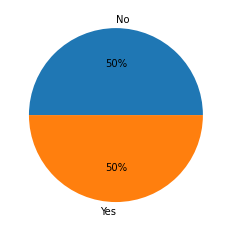

In [19]:
X = heart_disease_df.drop("HeartDisease", axis=1)
X = full_pipeline.fit_transform(X)

y = heart_disease_df["HeartDisease"]


under_sampler = RandomUnderSampler(sampling_strategy=1)

x_under, y_under = under_sampler.fit_resample(X, y)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

### Create Train and Test Group

In [20]:
uX_train, uX_test, uy_train, uy_test = train_test_split(x_under, y_under, test_size=0.15, random_state = 5)

## ML Models and Hyperparameter Tuning

Every model will be tested initially and followed by two hyperparameter tuning 
<br>
**There are error messages in the grid search section due to some penalty and solver conflict (ex., `solver= lbfgs` cannot use `penalty = l1`). This can be optimized and removed by (1.) adding a command on ignoring error messages and (2.) using {[],[]} in grid search to specify each solver searching range. However, it is not necessary. As a reason, it still trains all the model except the one that is in conflict, unless no model is tested**

### ML Model: Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4059
           1       0.76      0.78      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



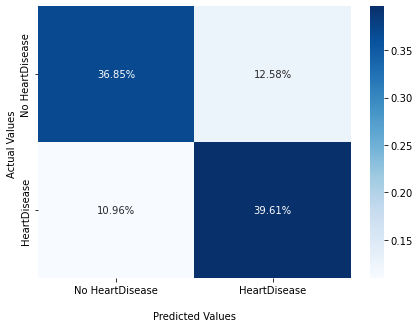

train accuracy:  76.4 %
test accuracy:  76.6 %


In [21]:
model_LR =  LogisticRegression(n_jobs= -1, random_state = 5)

model_LR.fit(uX_train, uy_train)

y_preds_LR = (model_LR.predict_proba(uX_test)[:,1] >= 0.5).astype(bool) 

print(classification_report(uy_test, y_preds_LR))

cm = confusion_matrix(uy_test, y_preds_LR)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

print("train accuracy: ", (cross_val_score(model_LR, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_LR, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

In [4]:
# Hyperparameter Tuning -1

In [23]:
model_LR =  LogisticRegression(n_jobs= -1, random_state = 5)

grid = {'penalty' : ['l1', 'l2','elasticnet'], #Lasso= l1(few features are more important); ridge= L2 
        'C' : np.logspace(-3, 1, 20), #smaller values specify stronger regularization; default as 1 
        'solver' : ['lbfgs','saga'], #saga handles l1; lbfgs does not
        } 

gs_LR = GridSearchCV(estimator=model_LR,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_LR.fit(uX_train, uy_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'saga']},
             verbose=2)

In [24]:
print(gs_LR.best_params_)

{'C': 0.011288378916846888, 'penalty': 'l2', 'solver': 'lbfgs'}


In [25]:
model_LR = LogisticRegression(C= 0.20691380811147903, max_iter= 100, penalty= "l1", solver= "saga", n_jobs= -1, random_state = 5)
print("train accuracy: ", (cross_val_score(model_LR, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_LR, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

train accuracy:  76.42 %
test accuracy:  76.59 %


In [26]:
# Hyperparameter Tuning -2

In [27]:
model_LR =  LogisticRegression(n_jobs= -1, random_state = 5)

grid = {'penalty' : ['l1'], #Lasso= l1(few features are more important); ridge= L2 
        'C' : np.linspace(0.15, 0.25, 50), #smaller values specify stronger regularization; default as 1 
        'solver' : ['saga'], #saga handles l1; lbfgs does not
        "max_iter" : [50, 75, 100, 150]
        } 

gs_LR = GridSearchCV(estimator=model_LR,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_LR.fit(uX_train, uy_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'C': array([0.15      , 0.15204082, 0.15408163, 0.15612245, 0.15816327,
       0.16020408, 0.1622449 , 0.16428571, 0.16632653, 0.16836735,
       0.17040816, 0.17244898, 0.1744898 , 0.17653061, 0.17857143,
       0.18061224, 0.18265306, 0.18469388, 0.18673469, 0.18877551,
       0.19081633, 0.19285714, 0.19489796...9897959,
       0.20102041, 0.20306122, 0.20510204, 0.20714286, 0.20918367,
       0.21122449, 0.21326531, 0.21530612, 0.21734694, 0.21938776,
       0.22142857, 0.22346939, 0.2255102 , 0.22755102, 0.22959184,
       0.23163265, 0.23367347, 0.23571429, 0.2377551 , 0.23979592,
       0.24183673, 0.24387755, 0.24591837, 0.24795918, 0.25      ]),
                         'max_iter': [50, 75, 100, 150], 'penalty': ['l1'],
                         'solver': ['saga']},
             verbose=2)

In [28]:
print(gs_LR.best_params_)

{'C': 0.23775510204081635, 'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}


In [29]:
model_LR = LogisticRegression(C= 0.19081632653061226, max_iter= 50, penalty= "l1", solver= "saga", n_jobs= -1, random_state = 5)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4059
           1       0.76      0.78      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



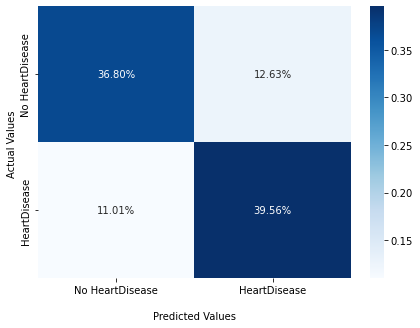

train accuracy:  76.41 %
test accuracy:  76.59 %


In [30]:
gs_LR_y_preds = gs_LR.predict(uX_test)

print(classification_report(uy_test, gs_LR_y_preds))

cm = confusion_matrix(uy_test, gs_LR_y_preds)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

print("train accuracy: ", (cross_val_score(model_LR, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_LR, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

### ML Model: Stochastic Gradient Descent (SGD) Classifier 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4059
           1       0.76      0.78      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



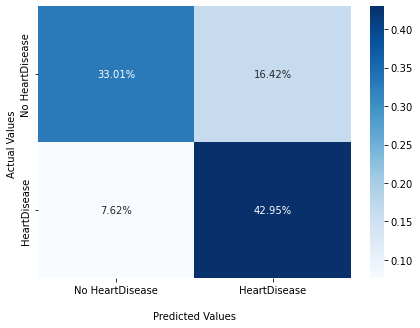

train accuracy:  75.19 %
test accuracy:  76.01 %


In [31]:
model_SGD = SGDClassifier(random_state = 5,n_jobs=-1)
model_SGD.fit(uX_train, uy_train);

y_preds_SGD = model_SGD.predict(uX_test)

print(classification_report(uy_test, y_preds_LR))

cm = confusion_matrix(uy_test, y_preds_SGD)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

print("train accuracy: ", (cross_val_score(model_SGD, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_SGD, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

In [32]:
# Hyperparameter Tuning -1

In [33]:
model_SGD = SGDClassifier(random_state = 5,n_jobs=-1)

grid = {"alpha" :[0.0001,0.001,0.01,0.1,1,2,5], #affect how learning rate will be optimized 
        'penalty' : ['l1', 'l2','elasticnet'],
        "learning_rate" : ['constant', 'optimal']
       }
gs_SGD = GridSearchCV(estimator=model_SGD,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_SGD.fit(uX_train, uy_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
63 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "C:\Users\dakfo\m

GridSearchCV(cv=3, estimator=SGDClassifier(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'learning_rate': ['constant', 'optimal'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [34]:
print(gs_SGD.best_params_)

{'alpha': 0.01, 'learning_rate': 'optimal', 'penalty': 'l2'}


In [35]:
model_SGD = SGDClassifier(alpha = 0.01, learning_rate = 'optimal', penalty = 'l2', n_jobs= -1, random_state = 5)
print("train accuracy: ", (cross_val_score(model_SGD, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_SGD, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

train accuracy:  76.22 %
test accuracy:  76.55 %


In [36]:
# Hyperparameter Tuning -2

In [37]:
model_SGD = SGDClassifier(random_state = 5,n_jobs=-1)

grid = {"alpha" :np.linspace(0.006, 0.016, 50), #affect how learning rate will be optimized 
        'penalty' : ['l2'],
        "learning_rate" : ['optimal'],
        "max_iter" : [100, 500, 750,1000, 1250] #default 1000
       }
gs_SGD = GridSearchCV(estimator=model_SGD,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_SGD.fit(uX_train, uy_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=SGDClassifier(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'alpha': array([0.006     , 0.00620408, 0.00640816, 0.00661224, 0.00681633,
       0.00702041, 0.00722449, 0.00742857, 0.00763265, 0.00783673,
       0.00804082, 0.0082449 , 0.00844898, 0.00865306, 0.00885714,
       0.00906122, 0.00926531, 0.00946939, 0.00967347, 0.00987755,
       0.01008163, 0.01028571, 0.0104898...
       0.01110204, 0.01130612, 0.0115102 , 0.01171429, 0.01191837,
       0.01212245, 0.01232653, 0.01253061, 0.01273469, 0.01293878,
       0.01314286, 0.01334694, 0.01355102, 0.0137551 , 0.01395918,
       0.01416327, 0.01436735, 0.01457143, 0.01477551, 0.01497959,
       0.01518367, 0.01538776, 0.01559184, 0.01579592, 0.016     ]),
                         'learning_rate': ['optimal'],
                         'max_iter': [100, 500, 750, 1000, 1250],
                         'penalty': ['l2']},
             verbose=2)

In [38]:
print(gs_SGD.best_params_)

{'alpha': 0.01253061224489796, 'learning_rate': 'optimal', 'max_iter': 100, 'penalty': 'l2'}


In [39]:
model_SGD = SGDClassifier(alpha = 0.006816326530612245, learning_rate = 'optimal', penalty = 'l2',max_iter = 100, n_jobs= -1, random_state = 5)

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      4059
           1       0.74      0.81      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



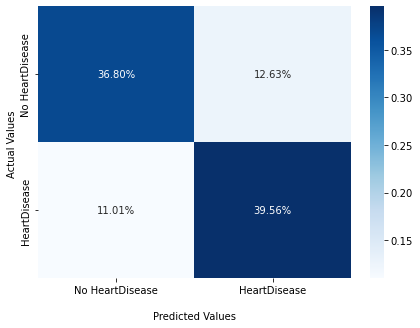

train accuracy:  76.38 %
test accuracy:  76.49 %


In [40]:
gs_SGD_y_preds = gs_SGD.predict(uX_test)

print(classification_report(uy_test, gs_SGD_y_preds))

cm = confusion_matrix(uy_test, gs_LR_y_preds)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_SGD, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_SGD, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

### ML Model: LinearSVC

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4059
           1       0.76      0.79      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


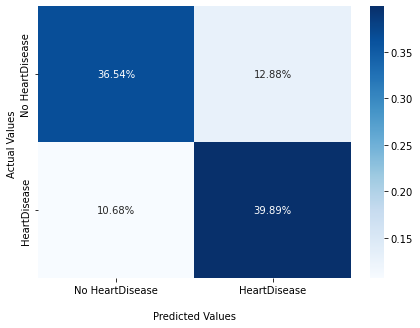

train accuracy:  76.42 %
test accuracy:  76.54 %


In [41]:
model_SVC = LinearSVC(random_state=5);

model_SVC.fit(uX_train, uy_train);

y_preds_SVC = model_SVC.predict(uX_test)

print(classification_report(uy_test, y_preds_SVC))

cm = confusion_matrix(uy_test, y_preds_SVC)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_SVC, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_SVC, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

In [42]:
# Hyperparameter Tuning -1

In [43]:
model_SVC = LinearSVC(random_state=5);

grid = {'penalty' : ['l1', 'l2'], #Lasso= l1(few features are more important); ridge= L2 
        'C' : np.logspace(-4, 2, 20), #smaller values specify stronger regularization; default as 1 
        } 


#decrease regularization increase gamma and C
gs_SVC = GridSearchCV(estimator=model_SVC,
                     param_grid=grid,
                     cv=3, 
                     verbose=1,
                     n_jobs = -1)

gs_SVC.fit(uX_train, uy_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type

GridSearchCV(cv=3, estimator=LinearSVC(random_state=5), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [44]:
print(gs_SVC.best_params_)

{'C': 0.00042813323987193956, 'penalty': 'l2'}


In [45]:
model_SVC = LinearSVC(C= 0.03359818286283781, max_iter= 3000, penalty= "l2", random_state = 5)
print("train accuracy: ", (cross_val_score(model_SVC , uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_SVC , uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

train accuracy:  76.36 %
test accuracy:  76.53 %


In [46]:
# Hyperparameter Tuning -2

In [47]:
model_SVC = LinearSVC(random_state=5);

grid = {'penalty' : ['l2'], #Lasso= l1(few features are more important); ridge= L2 
        'C' : np.linspace(0.025, 0.05, 50), #smaller values specify stronger regularization; default as 1 
        } 


#decrease regularization increase gamma and C
gs_SVC = GridSearchCV(estimator=model_SVC,
                     param_grid=grid,
                     cv=3, 
                     verbose=1,
                     n_jobs = -1)

gs_SVC.fit(uX_train, uy_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=LinearSVC(random_state=5), n_jobs=-1,
             param_grid={'C': array([0.025     , 0.0255102 , 0.02602041, 0.02653061, 0.02704082,
       0.02755102, 0.02806122, 0.02857143, 0.02908163, 0.02959184,
       0.03010204, 0.03061224, 0.03112245, 0.03163265, 0.03214286,
       0.03265306, 0.03316327, 0.03367347, 0.03418367, 0.03469388,
       0.03520408, 0.03571429, 0.03622449, 0.03673469, 0.0372449 ,
       0.0377551 , 0.03826531, 0.03877551, 0.03928571, 0.03979592,
       0.04030612, 0.04081633, 0.04132653, 0.04183673, 0.04234694,
       0.04285714, 0.04336735, 0.04387755, 0.04438776, 0.04489796,
       0.04540816, 0.04591837, 0.04642857, 0.04693878, 0.04744898,
       0.04795918, 0.04846939, 0.04897959, 0.0494898 , 0.05      ]),
                         'penalty': ['l2']},
             verbose=1)

In [48]:
print(gs_SVC.best_params_)

{'C': 0.047959183673469394, 'penalty': 'l2'}


In [49]:
model_SVC = LinearSVC(C= 0.027551020408163266, penalty= "l2", random_state = 5)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4059
           1       0.76      0.79      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



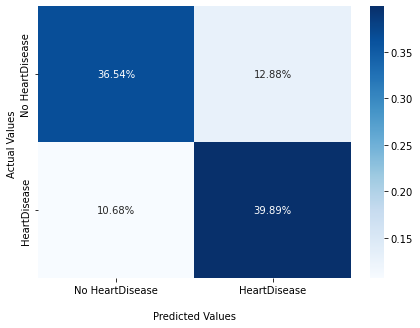

train accuracy:  76.34 %
test accuracy:  76.52 %


In [50]:
gs_SVC_y_preds = gs_SVC.predict(uX_test)
print(classification_report(uy_test, gs_SVC_y_preds))

cm = confusion_matrix(uy_test, gs_SVC_y_preds)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_SVC, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_SVC, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

### ML Model: Decision Tree Classifier

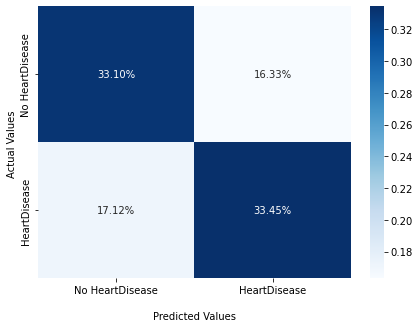

train accuracy:  66.39 %
test accuracy:  67.22 %


In [51]:
model_DT = DecisionTreeClassifier(random_state = 5)

model_DT.fit(uX_train, uy_train)

y_preds_DT = (model_DT.predict_proba(uX_test)[:,1] >= 0.5).astype(bool) 

cm = confusion_matrix(uy_test, y_preds_DT)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_DT, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_DT, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

In [52]:
# Hyperparameter Tuning -1

In [53]:
model_DT = DecisionTreeClassifier(random_state = 5)

grid = {"criterion": ["gini", "entropy"], #Gini impurity tends to isolate the most frequent class; entropy tends to produce slightly more balanced trees
        'max_features': [None,'auto'],
        'ccp_alpha': [0, 0.1, 0.01], #default = 0
        'max_depth' : [None, 2,3,5],
        "min_samples_split":[1,2,4],
        "min_samples_leaf": [1,2,5,10,20]} #Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model

gs_DT = GridSearchCV(estimator=model_DT,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_DT.fit(uX_train, uy_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a floa

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.1, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [1, 2, 4]},
             verbose=2)

In [54]:
print(gs_DT.best_params_)

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [55]:
model_DT = DecisionTreeClassifier(ccp_alpha = 0, criterion = 'gini', max_depth = None, max_features = 'auto', min_samples_leaf = 20, min_samples_split = 2, random_state = 5)
print("train accuracy: ", (cross_val_score(model_DT, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_DT, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

train accuracy:  72.19 %
test accuracy:  74.33 %


In [56]:
# Hyperparameter Tuning -2

In [57]:
model_DT = DecisionTreeClassifier(random_state = 5)

grid = {"criterion": ["gini"], #Gini impurity tends to isolate the most frequent class; entropy tends to produce slightly more balanced trees
        'max_features': ['auto'],
        'ccp_alpha': [0,0.001], #default = 0
        'max_depth' : [None],
        "min_samples_split":[2],
        "min_samples_leaf": [20,40,80,100]} #Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model

gs_DT = GridSearchCV(estimator=model_DT,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_DT.fit(uX_train, uy_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.001], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['auto'],
                         'min_samples_leaf': [20, 40, 80, 100],
                         'min_samples_split': [2]},
             verbose=2)

In [58]:
print(gs_DT.best_params_)

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 40, 'min_samples_split': 2}


In [59]:
model_DT = DecisionTreeClassifier(ccp_alpha = 0, criterion = 'gini', max_depth = None, max_features = 'auto', min_samples_leaf = 40, min_samples_split = 2, random_state = 5)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4059
           1       0.76      0.78      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



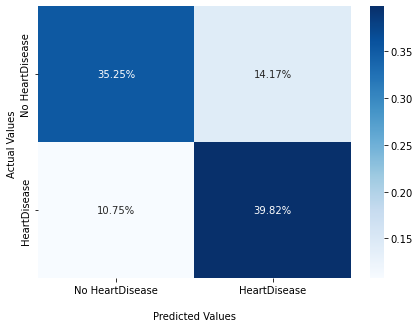

train accuracy:  73.42 %
test accuracy:  74.36 %


In [60]:
gs_DT_y_preds = gs_DT.predict(uX_test)
print(classification_report(uy_test, gs_LR_y_preds))

cm = confusion_matrix(uy_test, gs_DT_y_preds)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_DT, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_DT, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

### ML Model: RandomForest Classifier

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      4059
           1       0.73      0.76      0.75      4153

    accuracy                           0.74      8212
   macro avg       0.74      0.74      0.74      8212
weighted avg       0.74      0.74      0.74      8212



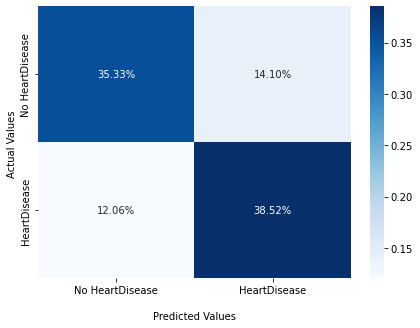

train accuracy:  74.46 %
test accuracy:  74.16 %


In [61]:
model_RF = RandomForestClassifier(random_state = 5, n_jobs = -1)

model_RF.fit(uX_train, uy_train)

y_preds_RF  = model_RF.predict(uX_test)

print(classification_report(uy_test, y_preds_RF))

cm = confusion_matrix(uy_test, y_preds_RF)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_RF, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_RF, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

In [62]:
# Hyperparameter Tuning -1

In [63]:
model_RF = RandomForestClassifier(random_state = 5, n_jobs = -1)

grid = {'n_estimators': [100, 200, 300],
        "criterion": ["Gini","entropy"], #Gini impurity tends to isolate the most frequent class; entropy tends to produce slightly more balanced trees
        'max_features': ['auto'],
        'ccp_alpha': [0], #default = 0
        'max_depth' : [None],
        "min_samples_split":[2,4],
        "min_samples_leaf": [20,30,40]}

gs_RF = GridSearchCV(estimator=model_RF,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_RF.fit(uX_train, uy_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\dakfo\miniconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\dakfo\miniconda3\lib\site-packages\joblib\parallel.py

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0], 'criterion': ['Gini', 'entropy'],
                         'max_depth': [None], 'max_features': ['auto'],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [64]:
print(gs_RF.best_params_)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 2, 'n_estimators': 300}


In [65]:
model_RF = RandomForestClassifier(ccp_alpha = 0, criterion = 'entropy', max_depth = None, max_features= 'auto', min_samples_leaf= 20, min_samples_split = 2, n_estimators = 200, random_state = 5, n_jobs = -1)
print("train accuracy: ", (cross_val_score(model_LR, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_LR, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

train accuracy:  76.41 %
test accuracy:  76.59 %


In [66]:
# Hyperparameter Tuning -2

In [67]:
model_RF = RandomForestClassifier(random_state = 5, n_jobs = -1)

grid = {'n_estimators': [150, 200, 250],
        "criterion": ["entropy"], #Gini impurity tends to isolate the most frequent class; entropy tends to produce slightly more balanced trees
        'max_features': ['auto'],
        'ccp_alpha': [0], #default = 0
        'max_depth' : [None],
        "min_samples_split":[1,2,3],
        "min_samples_leaf": [15,20,25]}

gs_RF = GridSearchCV(estimator=model_RF,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_RF.fit(uX_train, uy_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\dakfo\miniconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\dakfo\miniconda3\lib\site-packages\joblib\parallel.py"

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0], 'criterion': ['entropy'],
                         'max_depth': [None], 'max_features': ['auto'],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [68]:
print(gs_RF.best_params_)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 150}


In [69]:
model_RF = RandomForestClassifier(ccp_alpha = 0, criterion = 'entropy', max_depth = None, max_features= 'auto', min_samples_leaf= 15, min_samples_split = 2, n_estimators = 250, random_state = 5, n_jobs = -1)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4059
           1       0.74      0.80      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



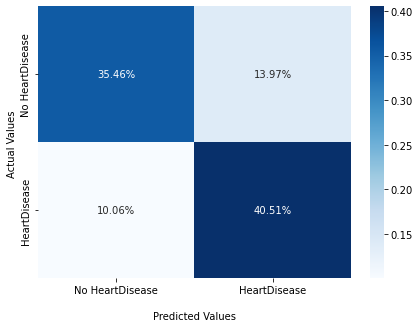

train accuracy:  76.04 %
test accuracy:  76.63 %


In [70]:
gs_RF_y_preds = gs_RF.predict(uX_test)
print(classification_report(uy_test, gs_RF_y_preds))

cm = confusion_matrix(uy_test, gs_RF_y_preds)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_RF, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_RF, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

### ML Model: XGB Classifier

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4059
           1       0.74      0.80      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



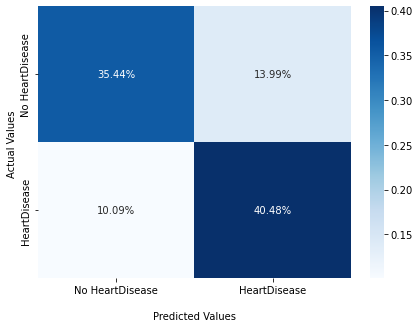

train accuracy:  74.53 %
test accuracy:  76.05 %


In [71]:
model_XGB = XGBClassifier(random_state=5);

model_XGB.fit(uX_train, uy_train);

y_preds_XGB = (model_XGB.predict_proba(uX_test)[:,1] >= 0.5).astype(bool) 

print(classification_report(uy_test, y_preds_XGB))

cm = confusion_matrix(uy_test, y_preds_XGB)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

print("train accuracy: ", (cross_val_score(model_XGB, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_XGB, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

In [72]:
model_XGB = XGBClassifier(random_state=5);

grid = [
        {"learning_rate": np.linspace(0.1,1,5),'gamma': np.logspace(-4, 0.8, 5)},
        {"n_estimators": [100,150,200,250]}
       ]

gs_XGB = GridSearchCV(estimator=model_XGB,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_XGB.fit(uX_train, uy_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [73]:
print(gs_XGB.best_params_)

{'gamma': 6.309573444801933, 'learning_rate': 0.1}


In [74]:
model_XGB = XGBClassifier(gamma = 6.309573444801933, learning_rate = 0.325, random_state=5)

In [75]:
print("train accuracy: ", (cross_val_score(model_XGB, uX_test, uy_test, cv=3,  scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_XGB, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

train accuracy:  76.02 %
test accuracy:  76.73 %


In [76]:
model_XGB = XGBClassifier(random_state=5);

grid =  {"learning_rate": np.linspace(0.21,0.43,5),
         'gamma': np.linspace(2, 20, 20),
        }

gs_XGB = GridSearchCV(estimator=model_XGB,
                     param_grid=grid,
                     cv=3, 
                     verbose=2,
                     n_jobs = -1)

gs_XGB.fit(uX_train, uy_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     random_state=5, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': array([ 2.        ,  2.94736842,  3.89473684,  4.84210526, 

In [77]:
print(gs_XGB.best_params_)

{'gamma': 6.7368421052631575, 'learning_rate': 0.21}


In [78]:
model_XGB = XGBClassifier(gamma = 9.578947368421051, learning_rate = 0.21, random_state=5)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4059
           1       0.75      0.80      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



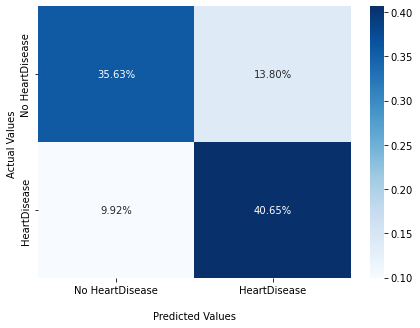

train accuracy:  76.3 %
test accuracy:  76.83 %


In [79]:
gs_XGB_y_preds = gs_XGB.predict(uX_test)

print(classification_report(uy_test, gs_XGB_y_preds))

cm = confusion_matrix(uy_test, gs_XGB_y_preds)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

print("train accuracy: ", (cross_val_score(model_XGB, uX_test, uy_test, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")
print("test accuracy: ", (cross_val_score(model_XGB, uX_train, uy_train, cv=3, scoring="accuracy", n_jobs=-1).mean()*100).round(2),"%")

## ML Models Comparison

In [80]:
model = [model_LR ,model_SGD,  model_SVC, model_DT, model_RF, model_XGB]
model_n = ["Logistic Regression", "SGD" , "SVC", "Decision Tree", "RandomForest", "XGBoost"]

### Precision and Recall Change with Different Thresholds

In [81]:
Thresholds = np.linspace(0,1,200)

In [82]:
def plot_precison_and_recall(precision_box, recall_box, Thresholds):
    plt.plot(Thresholds, precision_box, label = "Precision")
    plt.plot(Thresholds, recall_box,  label = "Recall")
    
    plt.xlabel('Threshold') 
    plt.ylabel('Precision/Recall') 
    plt.legend() 

def plot_precison_and_recall_2(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions, label = "Precision")
    plt.plot(thresholds, recalls,  label = "Recall")
    plt.title('Precision and recall with different threshold') 
    plt.xlabel('Threshold') 
    plt.ylabel('Precision/Recall') 
    plt.legend()     

In [83]:
def model_box_generator(model):
    precision_box = []
    recall_box = []
    for i in range(len(Thresholds)):
        y_preds = (model.predict_proba(uX_test)[:,1] >= Thresholds[i]).astype(bool) 
        precision_box.append(precision_score(uy_test,y_preds))
        recall_box.append(recall_score(uy_test,y_preds))
        
    return precision_box, recall_box

C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

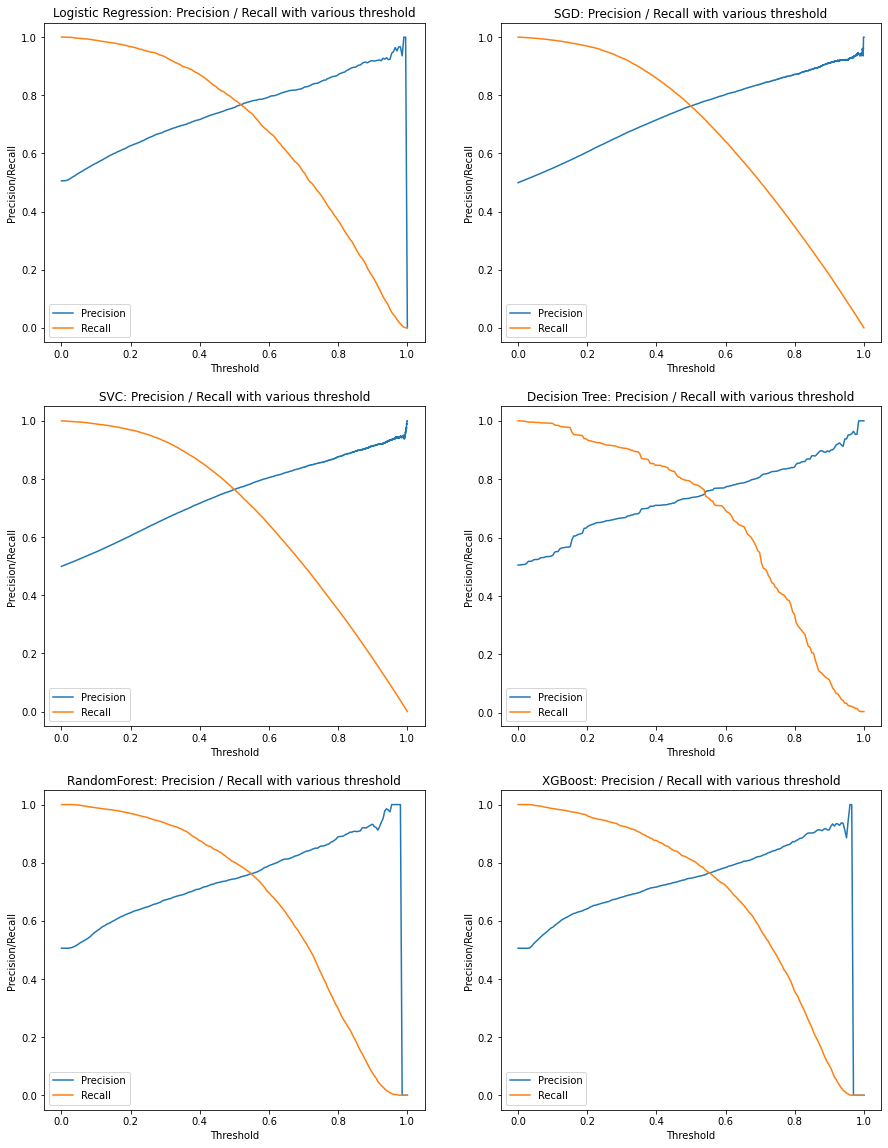

In [84]:
plt.figure(figsize=(15,20))

for i in range(len(model)):
    model[i].fit(uX_train, uy_train)
    try:
        precision_box, recall_box = model_box_generator(model[i])
        ax = plt.subplot(3,2,i+1)
        plot_precison_and_recall(precision_box, recall_box, Thresholds)
        plt.title(model_n[i] +': Precision / Recall with various threshold')
    
    except:
        ax = plt.subplot(3,2,i+1)
        y_scores = cross_val_predict(model[i], uX_train, uy_train, cv=3, method="decision_function")
        precisions, recalls, thresholds = precision_recall_curve(uy_train, y_scores)
        thresholds = np.linspace(0,0.99999,len(precisions))
        ax = plt.subplot(3,2,i+1)
        plot_precison_and_recall_2(precisions, recalls, thresholds)
        plt.title(model_n[i] +': Precision / Recall with various threshold') 
        

### ROC Curve 

#### Each Models in One Graph

In [85]:
def plot_roc_curve(fpr, tpr):
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()

In [86]:
def plot_roc_curve_2(model):

    model.fit(uX_train, uy_train)
    score_roc = model.decision_function(uX_test)
    fpr, tpr, thresholds = metrics.roc_curve(uy_test, score_roc)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()

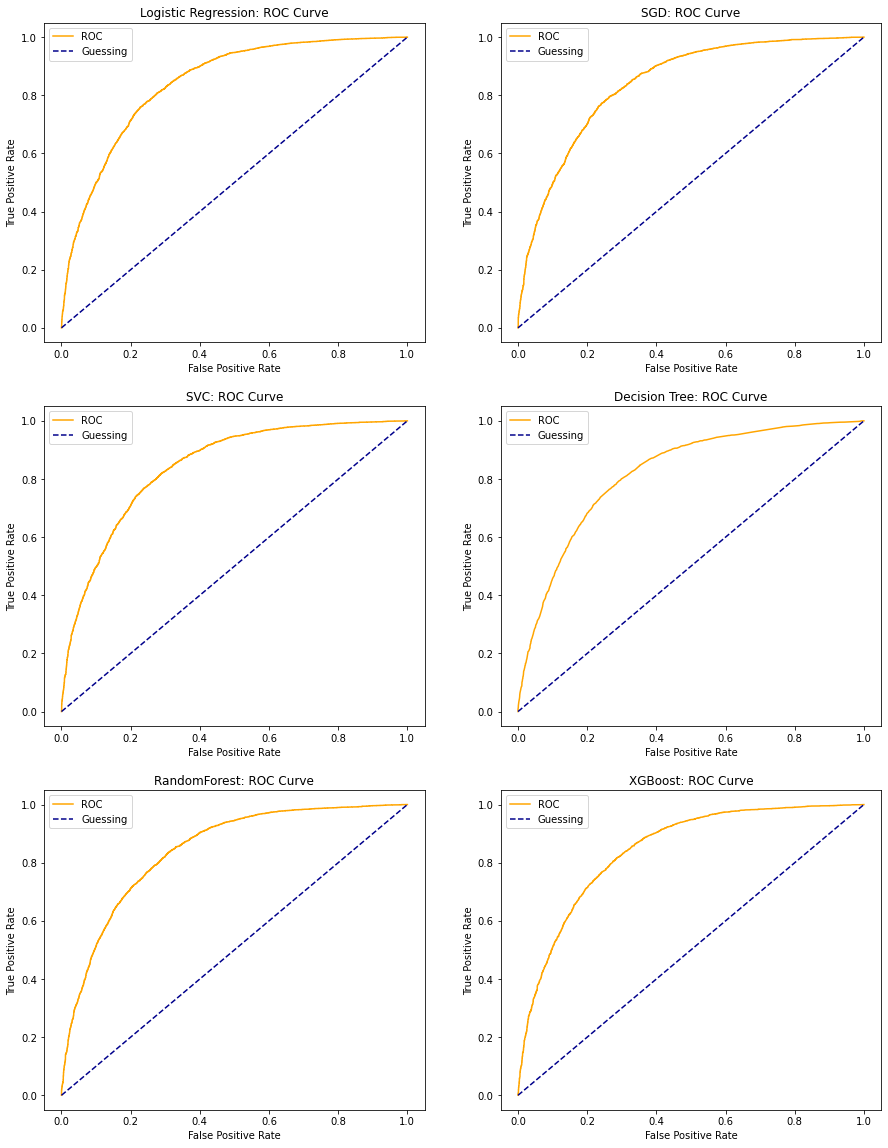

In [87]:
plt.figure(figsize=(15,20))
for i in range(len(model)):
    try:
        y_probs = model[i].predict_proba(uX_test)
        y_probs = y_probs[:, 1]
        fpr, tpr, thresholds = roc_curve(uy_test, y_probs)
        ax = plt.subplot(3,2,i+1)
        plot_roc_curve(fpr, tpr)
        plt.title(model_n[i]+ ": ROC Curve")
        
    except:
        ax = plt.subplot(3,2,i+1)
        plot_roc_curve_2(model[i])
        plt.title(model_n[i]+ ": ROC Curve")
plt.show()

#### All Models in Single Graph

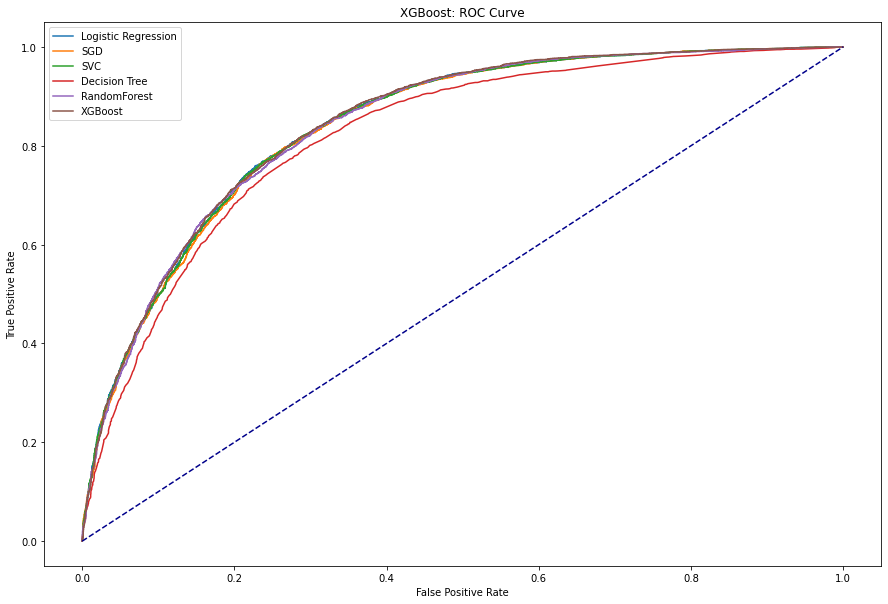

In [88]:
def plot_roc_curve(fpr, tpr, model_n):
    
    plt.plot(fpr, tpr, label= model_n)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()
    
def plot_roc_curve_2(model,model_n):

    model.fit(uX_train, uy_train)
    score_roc = model.decision_function(uX_test)
    fpr, tpr, thresholds = metrics.roc_curve(uy_test, score_roc)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=model_n)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()   
    
plt.figure(figsize=(15,10))
for i in range(len(model)):
    try:
        y_probs = model[i].predict_proba(uX_test)
        y_probs = y_probs[:, 1]
        fpr, tpr, thresholds = roc_curve(uy_test, y_probs)
        plot_roc_curve(fpr, tpr, model_n[i])
        plt.title(model_n[i]+ ": ROC Curve")
        
    except:
        plot_roc_curve_2(model[i],model_n[i])
        plt.title(model_n[i]+ ": ROC Curve")

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

## Models Combination Prediction - Undersampling Data

### Voting Classifer 

In [89]:
model_LR = LogisticRegression(n_jobs= -1, random_state = 5)
model_SGD = SGDClassifier(n_jobs= -1, random_state = 5)
model_SVC = LinearSVC(random_state = 5)
model_DT = DecisionTreeClassifier(random_state = 5)
model_RF = RandomForestClassifier(random_state = 5, n_jobs = -1)
model_XGB = XGBClassifier(random_state=5)

model_voting = VotingClassifier(
estimators=[('LR', model_LR),('SGD', model_SGD),('DT', model_DT),('RF', model_RF),('XGB', model_XGB)],
voting='hard')
model_voting.fit(uX_train, uy_train)

y_pred = model_voting.predict(uX_test)
print(classification_report(uy_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      4059
           1       0.74      0.81      0.78      4153

    accuracy                           0.76      8212
   macro avg       0.77      0.76      0.76      8212
weighted avg       0.77      0.76      0.76      8212



In [90]:
model_LR = LogisticRegression(C= 0.19081632653061226, max_iter= 50, penalty= "l1", solver= "saga", n_jobs= -1, random_state = 5)
model_SGD = SGDClassifier(alpha = 0.006816326530612245, learning_rate = 'optimal', penalty = 'l2',max_iter = 100, n_jobs= -1, random_state = 5)
model_SVC = LinearSVC(C= 0.027551020408163266, penalty= "l2", random_state = 5)
model_DT = DecisionTreeClassifier(ccp_alpha = 0, criterion = 'gini', max_depth = None, max_features = 'auto', min_samples_leaf = 40, min_samples_split = 2, random_state = 5)
model_RF = RandomForestClassifier(ccp_alpha = 0, criterion = 'entropy', max_depth = None, max_features= 'auto', min_samples_leaf= 15, min_samples_split = 2, n_estimators = 250, random_state = 5, n_jobs = -1)
model_XGB = XGBClassifier(gamma = 9.578947368421051, learning_rate = 0.21, random_state=5)

model_voting = VotingClassifier(
estimators=[('LR', model_LR),('SGD', model_SGD),('SVC', model_SVC), ('DT', model_DT),('RF', model_RF),('XGB', model_XGB)],
voting='hard')
model_voting.fit(uX_train, uy_train)

y_pred = model_voting.predict(uX_test)
print(classification_report(uy_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      4059
           1       0.75      0.79      0.77      4153

    accuracy                           0.76      8212
   macro avg       0.76      0.76      0.76      8212
weighted avg       0.76      0.76      0.76      8212



## Model Combination Prediction - Whole Data

After undersampling: Counter({0: 25977, 1: 25977})


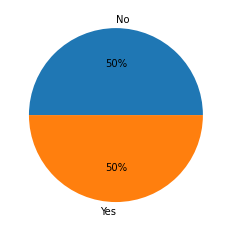

In [91]:
X = heart_disease_df.drop("HeartDisease", axis=1)
X = full_pipeline.fit_transform(X)

y = heart_disease_df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05, random_state=5)

under_sampler = RandomUnderSampler(sampling_strategy=1, random_state=5)

x_under, y_under = under_sampler.fit_resample(X_train, y_train)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], autopct='%.0f%%');

### Voting Classifer 

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     14594
           1       0.23      0.77      0.35      1396

    accuracy                           0.75     15990
   macro avg       0.60      0.76      0.60     15990
weighted avg       0.91      0.75      0.80     15990



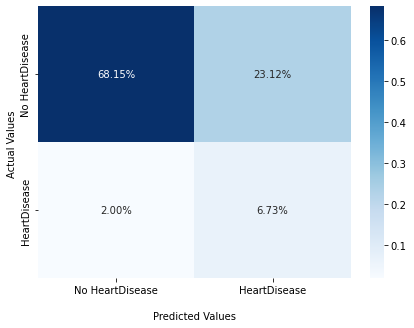

In [92]:
model_voting = VotingClassifier(
estimators=[('LR', model_LR),('SGD', model_SGD),('SVC', model_SVC), ('DT', model_DT),('RF', model_RF),('XGB', model_XGB)],
voting='hard')

model_voting.fit(x_under, y_under)

y_pred = model_voting.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

### All Agreement Prediction

              precision    recall  f1-score   support

           0       0.83      0.65      0.73      4059
           1       0.78      0.72      0.75      4153
           2       0.00      0.00      0.00         0

    accuracy                           0.68      8212
   macro avg       0.53      0.46      0.49      8212
weighted avg       0.80      0.68      0.74      8212



C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dakfo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


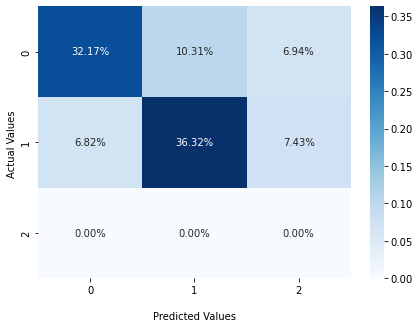

In [93]:
mutiple_y_predict = np.array([2]*len(uX_test))

for i in range(len(gs_RF_y_preds)):
    if gs_LR_y_preds[i] == gs_SGD_y_preds[i]:
        if gs_SVC_y_preds[i] == gs_DT_y_preds[i]:
            if gs_RF_y_preds[i] == gs_XGB_y_preds[i]:
                if gs_LR_y_preds[i] == gs_SVC_y_preds[i]: 
                    if gs_LR_y_preds[i] == gs_RF_y_preds[i]: 
                        mutiple_y_predict[i] = gs_LR_y_preds[i]
                    

print(classification_report(uy_test, mutiple_y_predict))

cm = confusion_matrix(uy_test, mutiple_y_predict)
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show();


# Conclusion

**<font size="3">After half half undersampling:</font>**
1.	**76% accuracy scores** on undersampling test groups for all six models after hyperparameter tuning
2.	**Training and test group** shared the **similar cross-validation scores** (cv=3, scoring=accuracy). The models are not overfitting and do not requires regularization. 
3.	Hyperparameter Tuning is significant to Decision Tree-Based Models in this dataset. It can improve accuracy by around 3 to 8%. Conversely, other models only improve under a 1% accuracy score.
4.	**86.27% of the test data are inference as the same** class across all six models. They also score 75% accuracy.
5.	Roughly **78% is the maximum accuracy score** for this undersampling test group
<br>
(86.27* 0.75) + (100-86.27) =78.4%
<br>
(86.27* 0.75) = number of correct inferences with shared model prediction
<br>
(100- 86.27) =  assuming the rest of the inference is correct

**<font size="3">Applied to orgingal dataset:</font>**

With Final Model inference on **1000** patients (class 0: 914 patients; class 1: 86 patients): 

**682** patients are correctly predicted as not having heart disease (**True Positive**)  
<br>
**20** patients are miss to capture the disease (**False Negative**)
<br>
**67** patients are correctly predicted as having heart disease (**True Negative**)  
<br>
**231** patients are mis-labeled as having heart disease (**False Positive**)

1. The precision of class 1 classification is 23% (4 out of 1). 

2. Unlikely to reach high class 1 precision, due to the fact of (1.) **lack of sufficient informative features** (2.) **potential high-risk group patients presentation** 


# Discussion

**<font size="4">To improve the ML model inference:</font>**
1. **<font size="3">Collected more informative features:</font>**
* family history of heart disease 
* heart rate
2. **<font size="3">Data mining:</font>**  
* Classify sleeping time as "Normal sleep period," "undersleep," and "oversleep" groups. Since some undersleep and oversleep, groups may be because of disease or medical treatment.
* Filter the diabetes groups into two groups only (Yes or No). Since the "diabetes at pregnancy with heart disease" group lacks data 
* Quantify Physical and Mental Health features since ranking the level by own may have a bias (different personality).
3. **<font size="3">Get more documentation on all patients:</font>**
* Tracking back heart disease patients' past features document before they developed Heart Disease. 
* Tracking incorrect labelled as class 1 patients, determine whether they have a higher chance to develop heart disease in the following five years (if true: data can potentially classify into three groups: No Heart Disease, Develop Heart Disease within five years, Heart Disease Presented) 
4. **<font size="3">Applied Deep Learning to the dataset.</font>**
